# Standard Q-Learning

## Q-Learning Steps
1. First initialize the QTable with zeros.
2. Begin the training loop.
3. Select an action using the QTable.
4. Return the reward and new state
5. Select the highest QValue action for the new state.
6. Update the QValue of the current state and action.
7. Repeat the loop until stopped.

The QValue update formula is as follows:<br>
$ Q_{t}(s, a) = Q_{t-1}(s, a) + \alpha * \left(R(s, a) + \gamma * \underset{a'}{max}Q(s', a') - Q_{t-1}(s, a)\right) $ <br>
where,
* $ Q_{t}(s, a) $ is the new QValue at the given state and action
* $ Q_{t-1}(s, a) $ is the previous QValue at the given state and action
* $ \alpha $ is the learning rate
* $ R(s, a) $ is the reward function at the given state and action
* $ \gamma $ is the discount factor(for future steps)
* $ \underset{a'}{max}Q(s', a') $ is the highest QValue action for the potential next step
<br><br><br>
Note: $ (R(s, a) + \gamma * \underset{a'}{max}Q(s', a') - Q_{t-1}(s, a) $ is the temporal difference

In [ ]:
import numpy as np
import matplotlib
import matplotlib.style
import matplotlib.pyplot as plt
import random
import progressbar
import time

import gym

from IPython.display import clear_output

In [ ]:
matplotlib.style.use('ggplot')

environment = gym.make("CliffWalking-v0")
environment.render() # show what the "world" looks like

print(f"Number of states: {environment.observation_space.n}")
print(f"Number of actions: {environment.action_space.n}")

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

Number of states: 48
Number of actions: 4


In [ ]:
alpha = 0.6 # learning rate
epsilon = 0.1 # epsilon greedy random action rate
gamma = 0.25 # discount factor
q_table = np.zeros([environment.observation_space.n, environment.action_space.n])

Completion: [=============================================] 100%	Time:  0:00:05


**********************************
Training is done!
**********************************

Times fell: 2714
Wall Push: 1853
QTable:
[[-6.00000000e+02 -1.33333333e+00 -1.33333333e+00 -8.40200000e+02]
 [-9.96232878e+02 -1.33333331e+00 -1.33333331e+00 -1.33333332e+00]
 [-9.74703713e+02 -1.33333325e+00 -1.33333325e+00 -1.33333327e+00]
 [-8.40199980e+02 -1.33333302e+00 -1.33333302e+00 -1.33333329e+00]
 [-9.90077758e+02 -1.33333206e+00 -1.33333206e+00 -1.33333309e+00]
 [-9.90060027e+02 -1.33332825e+00 -1.33332825e+00 -1.33333212e+00]
 [-1.00007093e+03 -1.33331299e+00 -1.33331299e+00 -1.33333027e+00]
 [-1.00022829e+03 -1.33325195e+00 -1.33325195e+00 -1.33332706e+00]
 [-9.96233740e+02 -1.33300781e+00 -1.33300781e+00 -1.33329435e+00]
 [-9.99677100e+02 -1.33203125e+00 -1.33203125e+00 -1.33251947e+00]
 [-1.00006967e+03 -1.32812500e+00 -1.32812500e+00 -1.33273232e+00]
 [-9.74707125e+02 -9.98688381e+02 -1.31250000e+00 -1.33201436e+00]
 [-1.33333333e+00 -1.33333331e+00 -1.33333331e+00 -1.00031654e+03]

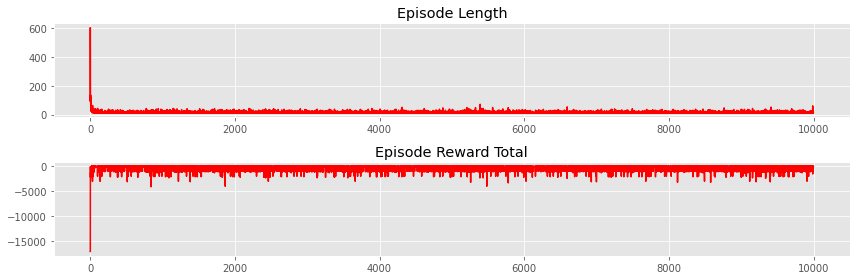

In [ ]:
num_episodes = 10000

times_fell = 0
fell_values = []
wall_pushes = 0
num_steps = 0
num_steps_values = []

episode_lengths = np.zeros(num_episodes)
episode_rewards = np.zeros(num_episodes)

fig, axes = plt.subplots(2, 1, figsize=(12, 4))

bar = progressbar.ProgressBar(maxval=num_episodes, widgets=['Completion: ', progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage(), '\t', progressbar.ETA()])
bar.start()

for episode in range(num_episodes):
    # reset the environment for a new episode
    state = environment.reset()
    
    reward = 0
    terminated = False
    episode_len = -1
    total_reward = 0
    
    while not terminated:
        episode_len += 1
        
        if random.uniform(0, 1) < epsilon:
            action = environment.action_space.sample()
        else:
            action = np.argmax(q_table[state])
            
        next_state, reward, terminated, info = environment.step(action)
        
        # if the state is the same change reward
        if state == next_state:
            reward = -1000
            wall_pushes += 1
        
        
        
        if reward == -100:
            times_fell += 1
            
        # record plot data
        total_reward += reward
            
            
        
        q_value = q_table[state, action]
        max_q_value = np.max(q_table[next_state])
        new_q_value = q_value + (alpha * ((reward + gamma * max_q_value) - q_value))
        
        q_table[state, action] = new_q_value
        state = next_state
        
    # set plot data
    episode_lengths[episode] = episode_len
    episode_rewards[episode] = total_reward
        
    if (episode + 1) % 100 == 0:
        #clear_output(wait=True)
        #print(f"Episode: {episode + 1}")
        #environment.render()
        bar.update(episode)
        
bar.finish()
        
print(
    "**********************************\n"
    "Training is done!\n"
    "**********************************\n"
)

print(f"Times fell: {times_fell}\nWall Push: {wall_pushes}")
print("QTable:")
print(q_table)

x = np.arange(1,num_episodes)
axes[0].plot(x, episode_lengths[x-1], 'r')
axes[0].grid(True)
axes[0].set_title("Episode Length")
axes[1].plot(x, episode_rewards[x-1], 'r')
axes[1].grid(True)
axes[1].set_title("Episode Reward Total")
fig.tight_layout()
plt.show()

**********************************
Results
**********************************

Epochs per episode: 13.0
Penalties per episode: 0.0
Wall pushes per episode: 0.0


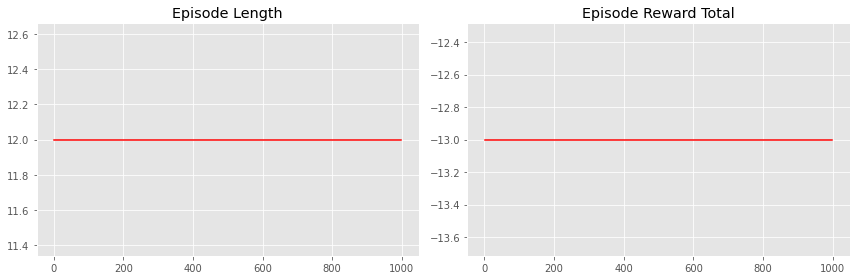

In [ ]:
total_epochs = 0
total_penalties = 0
wall_pushes = 0
num_of_episodes = 1000

episode_lengths = np.zeros(num_of_episodes)
episode_rewards = np.zeros(num_of_episodes)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for episode in range(num_of_episodes):
    state = environment.reset()
    next_state = 0
    epochs = 0
    penalties = 0
    reward = 0
    
    episode_len = -1
    total_reward = 0
    
    terminated = False
    
    while not terminated:
        episode_len += 1
        
        action = np.argmax(q_table[state])
        next_state, reward, terminated, info = environment.step(action)
        
        # if the state is the same change reward
        if state == next_state:
            wall_pushes += 1

        if reward == -100:
            penalties += 1

        epochs += 1
        
        state = next_state
        
        # record plot data
        total_reward += reward

    total_penalties += penalties
    total_epochs += epochs
    
    # set plot data
    episode_lengths[episode] = episode_len
    episode_rewards[episode] = total_reward

print(
    "**********************************\n"
    "Results\n"
    "**********************************\n"
)
print(f"Epochs per episode: {total_epochs / num_of_episodes}")
print(f"Penalties per episode: {total_penalties / num_of_episodes}")
print(f"Wall pushes per episode: {wall_pushes / num_of_episodes}")

x = np.arange(1,num_of_episodes)
axes[0].plot(x, episode_lengths[x-1], 'r')
axes[0].grid(True)
axes[0].set_title("Episode Length")
axes[1].plot(x, episode_rewards[x-1], 'r')
axes[1].grid(True)
axes[1].set_title("Episode Reward Total")
fig.tight_layout()
plt.show()

Run one more time to see path walked.

In [ ]:
state_map = np.zeros(48)

for _ in range(1):
    state = environment.reset()
    next_state = 0
    epochs = 0
    penalties = 0
    reward = 0
    
    terminated = False
    
    while not terminated:
        action = np.argmax(q_table[state])
        next_state, reward, terminated, info = environment.step(action)
        
        state_map[state] = 1

        if reward == -100:
            penalties += 1

        epochs += 1
        
        state = next_state

    total_penalties += penalties
    total_epochs += epochs
    
state_map = np.reshape(state_map, (4, 12))
print(f"States Map:\n{state_map}")

States Map:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


***
<br><br><br><br><br>
***

# Deep Q-Learning

In [ ]:
import numpy as np
import random
from IPython.display import clear_output
from collections import deque
import progressbar
import time

import gym

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.optimizers import Adam

In [ ]:
print(f"Num GPUs Available: {len(tf.config.experimental.list_physical_devices('GPU'))}")

# To debug which device is being used by what operation
#tf.debugging.set_log_device_placement(True)

Num GPUs Available: 0


In [ ]:
environment = gym.make("CliffWalking-v0")
environment.render()

print(f"Number of states: {environment.observation_space.n}")
print(f"Number of actions: {environment.action_space.n}")

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

Number of states: 48
Number of actions: 4


In [ ]:
class Agent:
    def __init__(self, environment, optimizer):
        
        # Initialize atributes
        self._state_size = environment.observation_space.n
        self._action_size = environment.action_space.n
        self._optimizer = optimizer
        
        self.experience_replay = deque(maxlen=2000)
        
        # Initialize discount and exploration rate
        self.epsilon = 0.1 # epsilon greedy random action rate
        self.gamma = 0.6 # discount factor
        
        # Build networks
        self.q_network = self._build_compile_model()
        self.target_network = self._build_compile_model()
        self.align_target_model()

    def store(self, state, action, reward, next_state, terminated):
        self.experience_replay.append((state, action, reward, next_state, terminated))
    
    def _build_compile_model(self):
        model = Sequential()
        model.add(Embedding(self._state_size, self._state_size, input_length=1))
        model.add(Reshape((self._state_size,)))
        model.add(Dense(50, activation='relu'))
        model.add(Dense(50, activation='relu'))
        model.add(Dense(self._action_size, activation='linear'))
        
        model.compile(loss='mse', optimizer=self._optimizer)
        return model

    def align_target_model(self):
        self.target_network.set_weights(self.q_network.get_weights())
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return environment.action_space.sample()
        
        q_values = self.q_network.predict(state)
        return np.argmax(q_values[0])

    def retrain(self, batch_size):
        minibatch = random.sample(self.experience_replay, batch_size)
        
        for state, action, reward, next_state, terminated in minibatch:
            
            target = self.q_network.predict(state)
            
            if terminated:
                target[0][action] = reward
            else:
                t = self.target_network.predict(next_state)
                target[0][action] = reward + self.gamma * np.amax(t)
            
            self.q_network.fit(state, target, epochs=1, verbose=0)

In [ ]:
optimizer = Adam(learning_rate=0.01)
agent = Agent(environment, optimizer)

batch_size = 32
num_of_episodes = 15 #10
timesteps_per_episode = 1000 #1000
agent.q_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 48)             2304      
_________________________________________________________________
reshape (Reshape)            (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                2450      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204       
Total params: 7,508
Trainable params: 7,508
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for e in range(0, num_of_episodes):
    # Reset the enviroment
    state = environment.reset()
    state = np.reshape(state, [1, 1])
    
    # Initialize variables
    reward = 0
    terminated = False
    
    bar = progressbar.ProgressBar(maxval=timesteps_per_episode/10, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    
    for timestep in range(timesteps_per_episode):
        # Run Action
        action = agent.act(state)
        #print(f"Chosen action: {action}")
        
        # Take action    
        next_state, reward, terminated, info = environment.step(action) 
        next_state = np.reshape(next_state, [1, 1])
        
        # if the state would remain the same change reward to -1000
        if state == next_state:
            reward = -300
        
        agent.store(state, action, reward, next_state, terminated)
        
        state = next_state
        
        if terminated:
            agent.align_target_model()
            break
            
        if len(agent.experience_replay) > batch_size:
            agent.retrain(batch_size)
        
        if timestep%10 == 0:
            bar.update(timestep/10 + 1)
            
        #print(f"State: {next_state}\tReward: {reward}\tTerm: {terminated}\tInfo: {info}\t")
    
    bar.finish()
    if (e + 1) % 10 == 0:
        print("**********************************")
        print(f"Episode: {e + 1}")
        environment.render()
        print("**********************************")

[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[                                                                        ] N/A%

**********************************
Episode: 10
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

**********************************


[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%


In [ ]:
total_epochs = 0
total_penalties = 0
episode_num = 0
num_of_episodes = 100
wall_pushes = 0

bar = progressbar.ProgressBar(maxval=num_of_episodes, widgets=['Completion: ', progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage(), '\t', progressbar.ETA()])
bar.start()
    
for _ in range(num_of_episodes):
    state = environment.reset()
    next_state = 0
    epochs = 0
    penalties = 0
    reward = 0
    
    terminated = False
    
    while not terminated:
        state = np.reshape(state, [1, 1])
        action = agent.act(state)
        next_state, reward, terminated, info = environment.step(action)
        
        # if the state is the same change reward
        if state == next_state:
            wall_pushes += 1

        if reward == -100:
            penalties += 1

        epochs += 1
        
        state = next_state
        
        if epochs%100 == 0:
            #print(f"Episode: {episode_num}\tState: {state}\tReward: {reward}\tTerm: {terminated}\tInfo: {info}\t")
            pass

    total_penalties += penalties
    total_epochs += epochs
    episode_num += 1
    bar.update(episode_num)
    
bar.finish()

print(
    "**********************************\n"
    "Results\n"
    "**********************************\n"
)
print(f"Epochs per episode: {total_epochs / num_of_episodes}")
print(f"Penalties per episode: {total_penalties / num_of_episodes}")
print(f"Wall pushes per episode: {wall_pushes / num_of_episodes}")

Completion: [=============================================] 100%	Time:  0:02:25


**********************************
Results
**********************************

Epochs per episode: 44.04
Penalties per episode: 0.37
Wall pushes per episode: 1.08
